# Import libraries

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 36.8 MB/s eta 0:00:00


In [2]:
import rdkit, rdkit.Chem, rdkit.Chem.Draw
from rdkit.Chem import Descriptors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib

# Read the database

In [3]:
!wget https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/kinase-examples.smi
!wget https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/lgic-examples.smi

--2025-11-01 11:58:42--  https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/kinase-examples.smi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145220 (142K) [text/plain]
Saving to: ‘kinase-examples.smi’

kinase-examples.smi 100%[===================>] 141.82K  --.-KB/s    in 0.02s   

2025-11-01 11:58:43 (8.33 MB/s) - ‘kinase-examples.smi’ saved [145220/145220]

--2025-11-01 11:58:43--  https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/lgic-examples.smi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10155

In [4]:
suppl_kinases=rdkit.Chem.rdmolfiles.SmilesMolSupplier('kinase-examples.smi')
kinases=[x for x in suppl_kinases]

In [5]:
suppl_lgic=rdkit.Chem.rdmolfiles.SmilesMolSupplier('lgic-examples.smi')
lgic=[x for x in suppl_lgic]

In [6]:
features_kinases=pd.DataFrame()
for i,mol in enumerate(kinases):
    features_kinases.loc[i,'MolWt']=Descriptors.MolWt(mol)
    features_kinases.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    features_kinases.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_kinases.loc[i,'NumRotBonds']=Descriptors.NumRotatableBonds(mol)
    features_kinases.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    features_kinases.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    features_kinases.loc[i,'RingCount']=Descriptors.RingCount(mol)
    features_kinases.loc[i,'TPSA']=Descriptors.TPSA(mol)
    features_kinases.loc[i,'Stereocenters']=rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(mol)
    features_kinases.loc[i,'Spiro']=rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(mol)
    features_kinases.loc[i,'NumArR']=Descriptors.NumAromaticRings(mol)
    features_kinases.loc[i,'NumAliR']=Descriptors.NumAliphaticRings(mol)
    features_kinases.loc[i,'set']=0

In [7]:
features_kinases

,MolWt,NumHAcceptors,NumHDonors,NumRotBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,398.482,3.0,3.0,7.0,7.0,0.363636,3.0,77.23,0.0,0.0,2.0,1.0,0.0
1,249.335,4.0,0.0,3.0,4.0,0.307692,2.0,29.54,0.0,0.0,1.0,1.0,0.0
2,442.491,5.0,4.0,6.0,9.0,0.391304,4.0,106.69,1.0,0.0,2.0,2.0,0.0
3,358.445,4.0,2.0,6.0,5.0,0.181818,4.0,76.82,1.0,0.0,4.0,0.0,0.0
4,332.407,3.0,2.0,3.0,5.0,0.200000,4.0,61.02,0.0,0.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,493.615,7.0,2.0,7.0,8.0,0.241379,5.0,86.28,0.0,0.0,4.0,1.0,0.0
1995,539.592,9.0,2.0,8.0,10.0,0.200000,5.0,120.50,0.0,0.0,5.0,0.0,0.0
1996,524.691,8.0,3.0,10.0,10.0,0.407407,4.0,108.48,0.0,0.0,3.0,1.0,0.0
1997,527.669,6.0,2.0,7.0,8.0,0.354839,5.0,80.65,0.0,0.0,4.0,1.0,0.0


In [8]:
features_lgic=pd.DataFrame()
for i,mol in enumerate(lgic):
    features_lgic.loc[i,'MolWt']=Descriptors.MolWt(mol)
    features_lgic.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    features_lgic.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_lgic.loc[i,'NumRotBonds']=Descriptors.NumRotatableBonds(mol)
    features_lgic.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    features_lgic.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    features_lgic.loc[i,'RingCount']=Descriptors.RingCount(mol)
    features_lgic.loc[i,'TPSA']=Descriptors.TPSA(mol)
    features_lgic.loc[i,'Stereocenters']=rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(mol)
    features_lgic.loc[i,'Spiro']=rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(mol)
    features_lgic.loc[i,'NumArR']=Descriptors.NumAromaticRings(mol)
    features_lgic.loc[i,'NumAliR']=Descriptors.NumAliphaticRings(mol)
    features_lgic.loc[i,'set']=1

In [9]:
features_lgic

,MolWt,NumHAcceptors,NumHDonors,NumRotBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,682.396,4.0,2.0,7.0,15.0,0.391304,2.0,92.34,0.0,0.0,2.0,0.0,1.0
1,650.398,3.0,2.0,7.0,13.0,0.391304,2.0,58.20,0.0,0.0,2.0,0.0,1.0
2,249.683,4.0,2.0,3.0,9.0,0.333333,1.0,92.45,0.0,0.0,1.0,0.0,1.0
3,255.665,3.0,1.0,3.0,8.0,0.333333,2.0,83.66,0.0,0.0,1.0,1.0,1.0
4,261.694,4.0,1.0,3.0,9.0,0.428571,2.0,83.66,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,296.301,2.0,2.0,4.0,5.0,0.058824,3.0,61.96,0.0,0.0,3.0,0.0,1.0
1736,342.380,7.0,0.0,3.0,8.0,0.250000,3.0,76.79,0.0,0.0,2.0,1.0,1.0
1737,397.934,6.0,1.0,5.0,9.0,0.066667,3.0,71.95,0.0,0.0,3.0,0.0,1.0
1738,292.338,2.0,2.0,4.0,4.0,0.111111,3.0,61.96,1.0,0.0,3.0,0.0,1.0


In [10]:
features=pd.concat((features_kinases,features_lgic))

In [11]:
features

,MolWt,NumHAcceptors,NumHDonors,NumRotBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,398.482,3.0,3.0,7.0,7.0,0.363636,3.0,77.23,0.0,0.0,2.0,1.0,0.0
1,249.335,4.0,0.0,3.0,4.0,0.307692,2.0,29.54,0.0,0.0,1.0,1.0,0.0
2,442.491,5.0,4.0,6.0,9.0,0.391304,4.0,106.69,1.0,0.0,2.0,2.0,0.0
3,358.445,4.0,2.0,6.0,5.0,0.181818,4.0,76.82,1.0,0.0,4.0,0.0,0.0
4,332.407,3.0,2.0,3.0,5.0,0.200000,4.0,61.02,0.0,0.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,296.301,2.0,2.0,4.0,5.0,0.058824,3.0,61.96,0.0,0.0,3.0,0.0,1.0
1736,342.380,7.0,0.0,3.0,8.0,0.250000,3.0,76.79,0.0,0.0,2.0,1.0,1.0
1737,397.934,6.0,1.0,5.0,9.0,0.066667,3.0,71.95,0.0,0.0,3.0,0.0,1.0
1738,292.338,2.0,2.0,4.0,4.0,0.111111,3.0,61.96,1.0,0.0,3.0,0.0,1.0


### Scaling of variables

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
features_scaled=pd.DataFrame(MinMaxScaler().fit_transform(features), columns=features.columns)

In [14]:
array = features_scaled.values

In [15]:
X = array[:,0:12]
Y = array[:,12]
feat=features.columns

# Feature Extraction aka Dimensionality Reduction

## Principal Component Analysis

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA()

In [18]:
low_dim=pca.fit_transform(X)

In [19]:
low_dim.shape

(3739, 12)

In [20]:
low_dim[:,0].shape

(3739,)

Text(0, 0.5, 'Explained Variance Ratio')

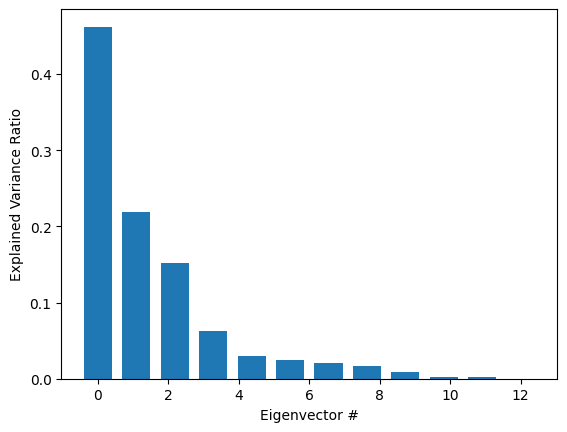

In [21]:
plt.bar(np.linspace(0,len(pca.explained_variance_ratio_), num=len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.xlabel("Eigenvector #")
plt.ylabel("Explained Variance Ratio")

## loadings

In [24]:
components = pca.components_
expl_var = pca.explained_variance_
loadings = components.T * np.sqrt(expl_var)

In [29]:
pc_names = [f"PC{i+1}" for i in range(components.shape[0])]
loadings_df = pd.DataFrame(loadings, index=feat[:-1], columns=pc_names)

In [30]:
k = min(5, loadings_df.shape[1]) # qua mostrerei solo una versione compatta, direi i primi 5, si può aumentare ma ho paura diventi un casino
row_importance = loadings_df.iloc[:, :k].abs().sum(axis=1)
loadings_df_sorted = loadings_df.loc[row_importance.sort_values(ascending=False).index]


In [32]:
loadings_df_sorted.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
FractionCSP3,-0.153503,0.128789,-0.018742,-0.052723,0.033345,0.013949,0.006306,-0.008551,0.007354,0.000990,-0.000591,-1.926119e-23
NumArR,0.221145,-0.006970,-0.041786,-0.017270,0.038135,0.022224,-0.006167,-0.005663,0.001410,0.002008,0.000723,-2.524343e-09
MolWt,0.115507,0.081905,0.014752,-0.024547,-0.033009,-0.009660,-0.008258,0.008820,0.023955,-0.006673,-0.007103,1.810557e-22
RingCount,0.102562,0.061922,-0.085566,0.011376,0.005255,-0.014986,0.001644,-0.008435,-0.006905,0.002609,0.001247,4.627962e-09
NumRotBonds,0.042786,0.051274,0.060576,-0.052405,-0.023993,0.002367,-0.031010,-0.003124,-0.023556,0.004730,0.003638,-4.030599e-23
NumAliR,-0.022077,0.080329,-0.076723,0.025418,-0.019000,-0.033132,0.006120,-0.006534,-0.009379,0.001850,0.001043,-3.786514e-09
NumHDonors,0.020017,0.038456,0.085612,0.039445,0.029243,-0.024703,-0.017520,-0.031089,0.003321,-0.007524,0.002168,-2.246359e-22
Stereocenters,-0.033238,0.068882,-0.011742,0.055531,0.013973,0.017591,-0.033524,0.037275,-0.001823,-0.001449,0.000858,-2.633329e-23
TPSA,0.033232,0.041508,0.067232,0.029197,0.008823,-0.001371,0.014729,0.001263,-0.003455,0.015668,-0.010919,5.290088e-22
NumHeteroatoms,0.051557,0.048483,0.049286,0.009639,-0.007559,-0.000249,0.023316,0.011466,0.014382,0.007024,0.014277,-3.627841e-22


In [40]:
len(loadings_df_sorted)

12

In [ ]:
# per vederlo forse meglio barplot

In [41]:
component   = "PC1"  #puoi usare da 1 a 5, dopo la quinta va cambiato anche la k sopra se non sbaglio
top_n_bar   = len(loadings_df_sorted)


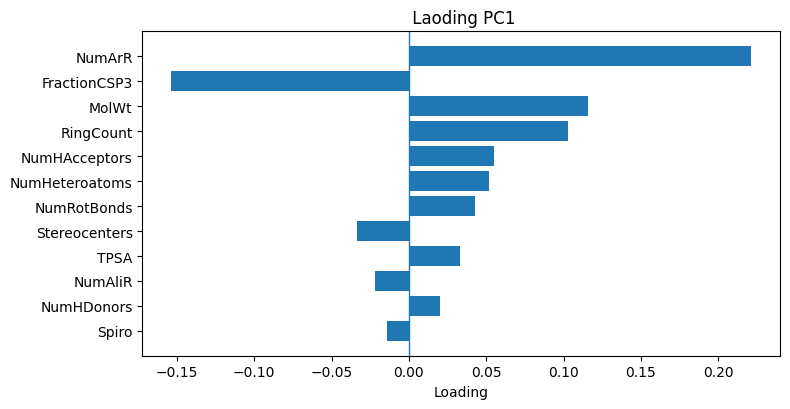

In [98]:
col = loadings_df_sorted[component]
top_bar = col.reindex(col.abs().sort_values(ascending=False).head(top_n_bar).index)

fig_h = max(3.6, 0.35 * len(top_bar))
fig, ax = plt.subplots(figsize=(8, fig_h))
y = np.arange(len(top_bar))[::-1]
ax.barh(y, top_bar.values)
ax.set_yticks(y)
ax.set_yticklabels(top_bar.index)
ax.axvline(0, linewidth=1)
ax.set_xlabel("Loading")
ax.set_title(f" Laoding {component}")
plt.tight_layout()
plt.show()


In [44]:
top_n_heat  = len(loadings_df_sorted)
n_comp_heat = 5

In [45]:
n_comp = min(n_comp_heat, loadings_df_sorted.shape[1])
pcs = loadings_df_sorted.columns[:n_comp]

importance = loadings_df_sorted[pcs].abs().sum(axis=1)
top_feats = importance.sort_values(ascending=False).head(top_n_heat).index
sub = loadings_df_sorted.loc[top_feats, pcs]

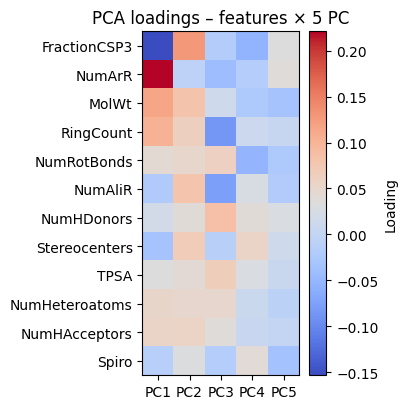

In [47]:
fig_w = max(3.0, 1.0 + 0.6 * n_comp)
fig_h = max(3.5, 0.35 * len(top_feats))
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

im = ax.imshow(sub.values, aspect="auto", cmap="coolwarm", interpolation="nearest")
ax.set_yticks(range(len(top_feats)))
ax.set_yticklabels(top_feats)
ax.set_xticks(range(n_comp))
ax.set_xticklabels(pcs)
ax.set_title(f"PCA loadings – features × {n_comp} PC")

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Loading")

plt.tight_layout()
plt.show()

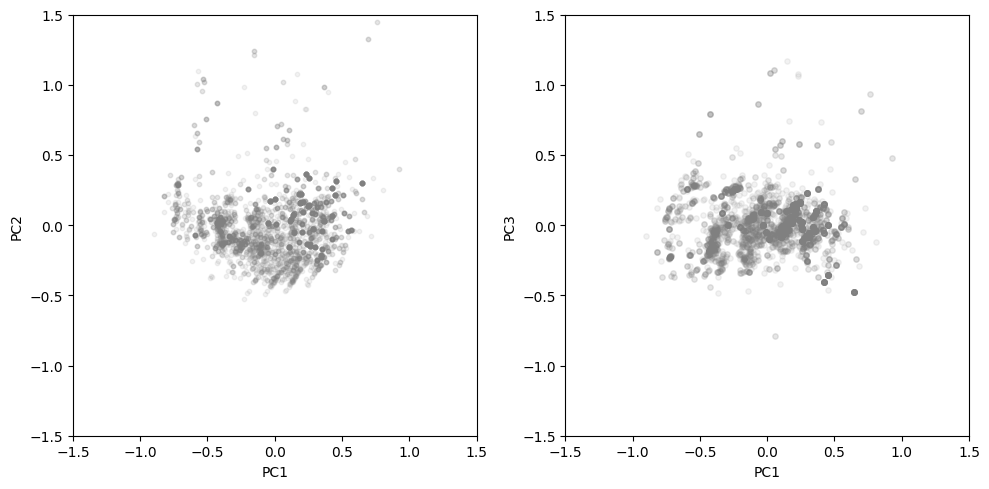

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(low_dim[:1999,0], low_dim[:1999,1], c='gray', alpha=0.1, s=10)
plt.scatter(low_dim[2000:,0], low_dim[2000:,1], c='gray', alpha=0.1, s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

plt.subplot(1, 2, 2)
plt.scatter(low_dim[:1999,0], low_dim[:1999,2], c='gray', alpha=0.1, s=15)
plt.scatter(low_dim[2000:,0], low_dim[2000:,2], c='gray', alpha=0.1, s=15)
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

plt.tight_layout()

Text(0, 0.5, 'PC2')

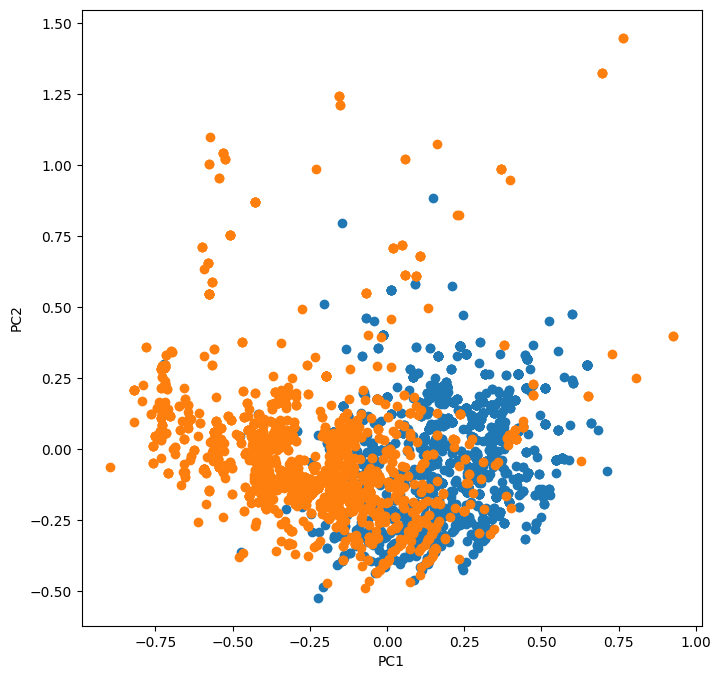

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(low_dim[:1999,0], low_dim[:1999,1])
plt.scatter(low_dim[2000:,0], low_dim[2000:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

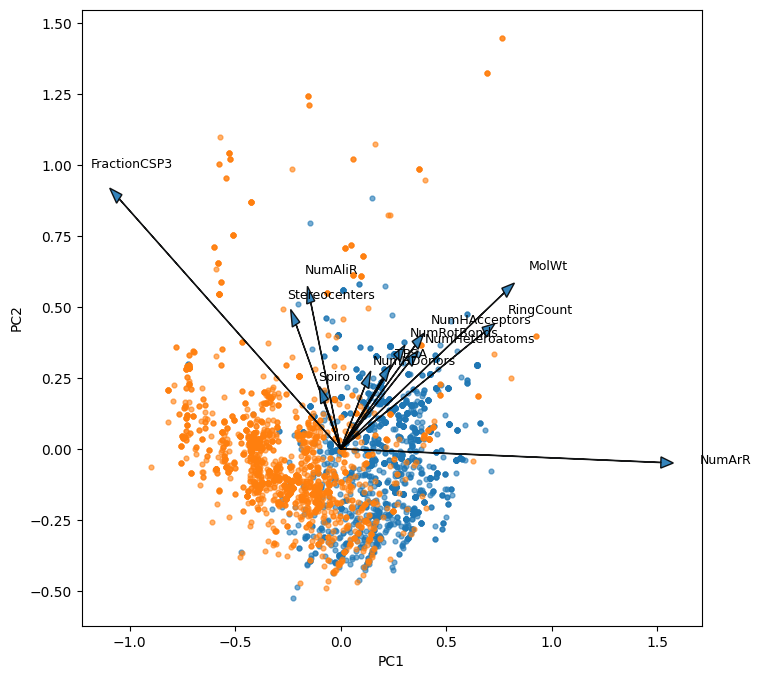

In [48]:
L2 = loadings_df[["PC1", "PC2"]].copy()
order = (L2**2).sum(axis=1).sort_values(ascending=False).head(12).index
L2 = L2.loc[order]

plt.figure(figsize=(8,8))
plt.scatter(low_dim[:1999,0], low_dim[:1999,1], s=12, alpha=0.6, label="Gruppo 1")
plt.scatter(low_dim[2000:,0],  low_dim[2000:,1], s=12, alpha=0.6, label="Gruppo 2")
plt.xlabel("PC1")
plt.ylabel("PC2")

x_span = low_dim[:,0].max() - low_dim[:,0].min()
y_span = low_dim[:,1].max() - low_dim[:,1].min()
max_span = max(x_span, y_span)
max_norm = np.sqrt((L2["PC1"]**2 + L2["PC2"]**2)).max()
scale = 0.8 * max_span / max_norm if max_norm > 0 else 1.0

for feat, row in L2.iterrows():
    x, y = row["PC1"] * scale, row["PC2"] * scale
    plt.arrow(0, 0, x, y, length_includes_head=True, head_width=max_span*0.02, alpha=0.9)
    plt.text(x*1.08, y*1.08, feat, fontsize=9)



In [49]:
from sklearn.cluster import *

In [50]:
kmeans=KMeans(n_clusters=8).fit(low_dim[:,:2])

In [51]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

Text(0, 0.5, 'PC2')

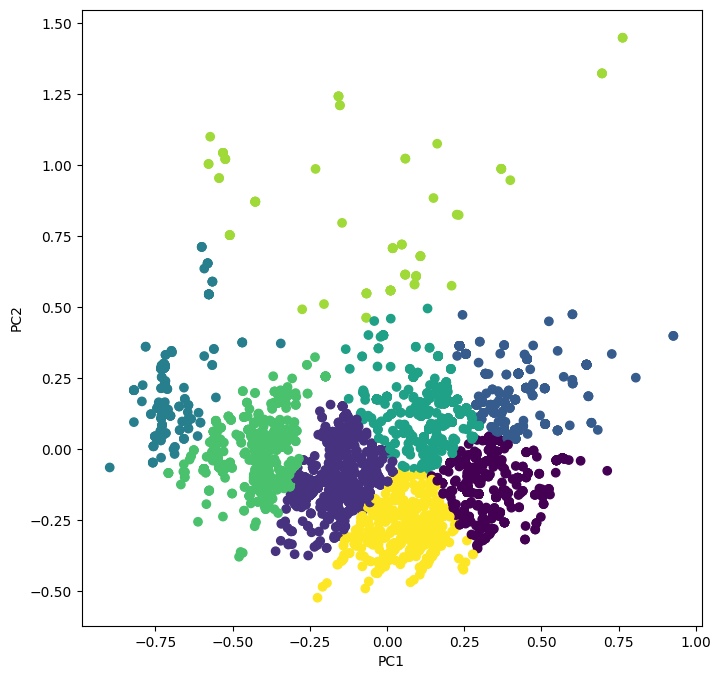

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(low_dim[:,0], low_dim[:,1],c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [53]:
tot=kinases+lgic

In [54]:
len(tot)

3739

In [55]:
closest_points= pairwise_distances_argmin_min(kmeans.cluster_centers_, low_dim[:,:2])
closest_points

(array([ 399, 3617, 1545, 2408, 1299, 2243, 1824, 1265]),
 array([0.02491566, 0.00462463, 0.01604308, 0.01989219, 0.00567436,
        0.00822235, 0.08654578, 0.01110108]))

In [56]:
low_dim[closest_points[0]].shape

(8, 12)

In [57]:
low_dim[closest_points[0],0]

array([ 0.34568757, -0.15967739,  0.39433072, -0.71127081,  0.13067192,
       -0.42289177, -0.14550366,  0.05941557])

In [58]:
low_dim[closest_points[0],1]

array([-0.14530676, -0.0921407 ,  0.20580239,  0.21087729,  0.12216776,
       -0.00687183,  0.79634932, -0.26367579])

Text(0, 0.5, 'PC2')

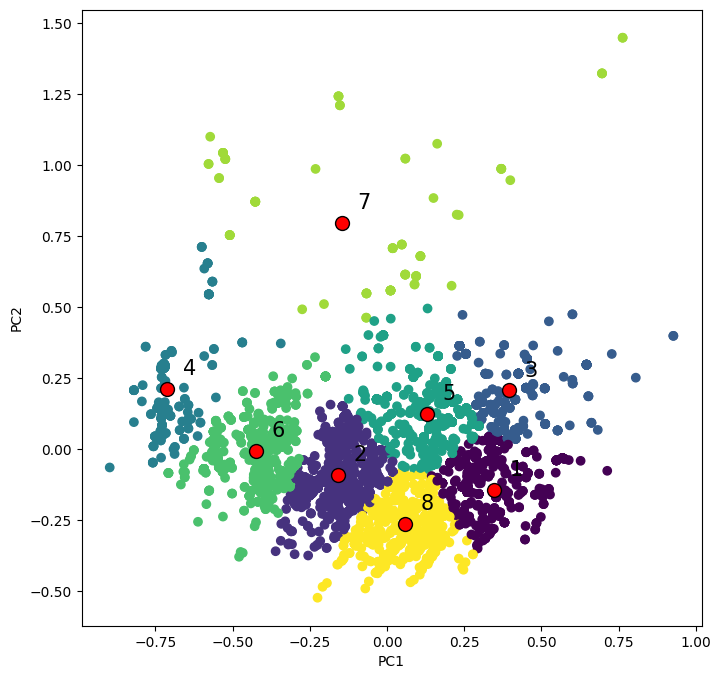

In [59]:
it=0
plt.figure(figsize=(8,8))
plt.scatter(low_dim[:,0], low_dim[:,1],c=kmeans.labels_)
for i in closest_points[0]:
  it+=1
  plt.scatter(low_dim[i,0], low_dim[i,1],marker='o',s=100,edgecolor="black",color="red" )
  plt.annotate(it, (low_dim[i,0]+0.05, low_dim[i,1]+0.05), color="black", fontsize=15)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [60]:
subset=[]
for i in closest_points[0]:
  subset.append(tot[i])

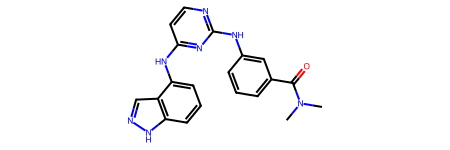

In [61]:
subset[0]

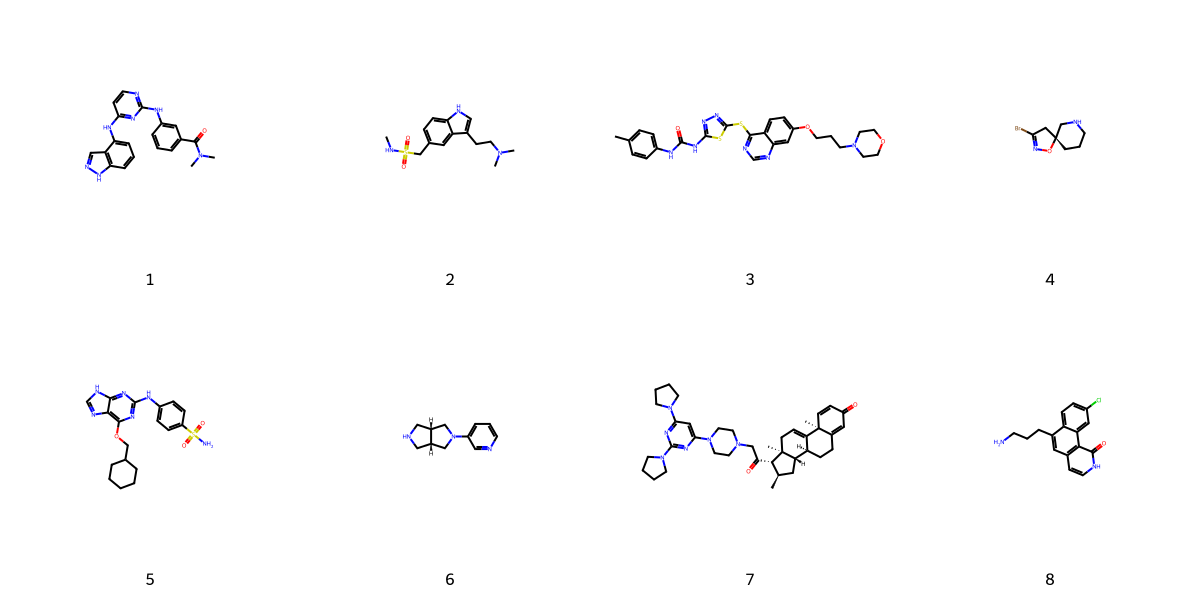

In [62]:
img=rdkit.Chem.Draw.MolsToGridImage(subset,molsPerRow=4,subImgSize=(300,300), legends=[str(x) for x in np.arange(1,9,1)])
img

## Non-linear dimensionality reduction methods

### 1. ISOMAP

In [63]:
from sklearn.manifold import Isomap

In [64]:
iso=Isomap(n_neighbors=12)

In [65]:
data_red=iso.fit_transform(X)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.12/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.12/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.12/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


Text(0, 0.5, 'ISOMAP2')

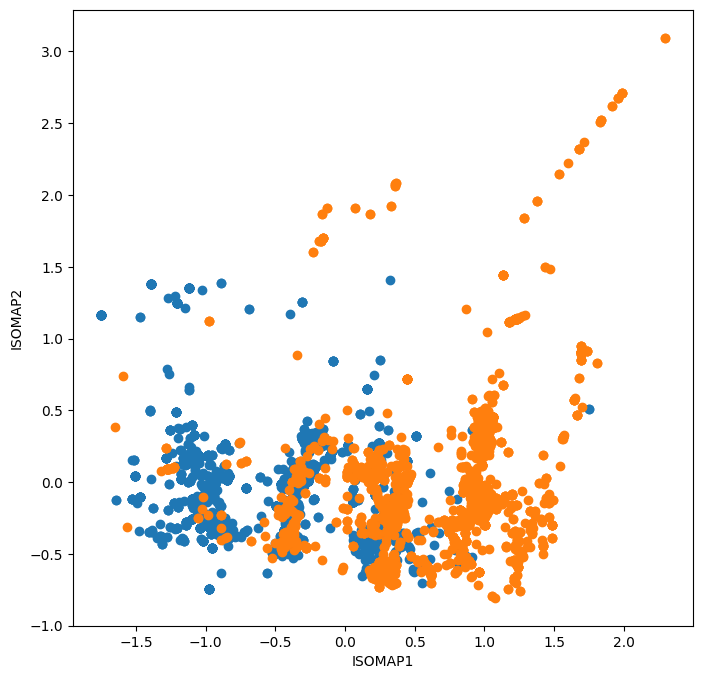

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(data_red[:1999,0], data_red[:1999,1])
plt.scatter(data_red[2000:,0], data_red[2000:,1])
plt.xlabel("ISOMAP1")
plt.ylabel("ISOMAP2")

In [67]:
kmeans=KMeans(n_clusters=8).fit(data_red[:,:2])

In [68]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

Text(0, 0.5, 'ISOMAP2')

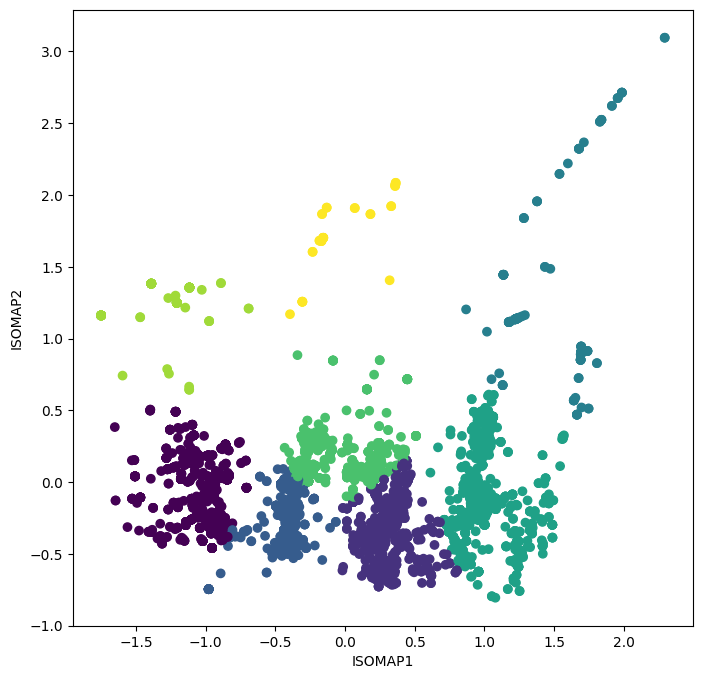

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(data_red[:,0], data_red[:,1],c=kmeans.labels_)
plt.xlabel("ISOMAP1")
plt.ylabel("ISOMAP2")

In [70]:
closest_points= pairwise_distances_argmin_min(kmeans.cluster_centers_, data_red[:,:2])
closest_points

(array([1240, 2876, 1324, 2747, 2345,  323, 1268, 2436]),
 array([0.04595744, 0.01521303, 0.01209085, 0.17969052, 0.00901882,
        0.03783731, 0.05939466, 0.13312122]))

Text(0, 0.5, 'ISOMAP2')

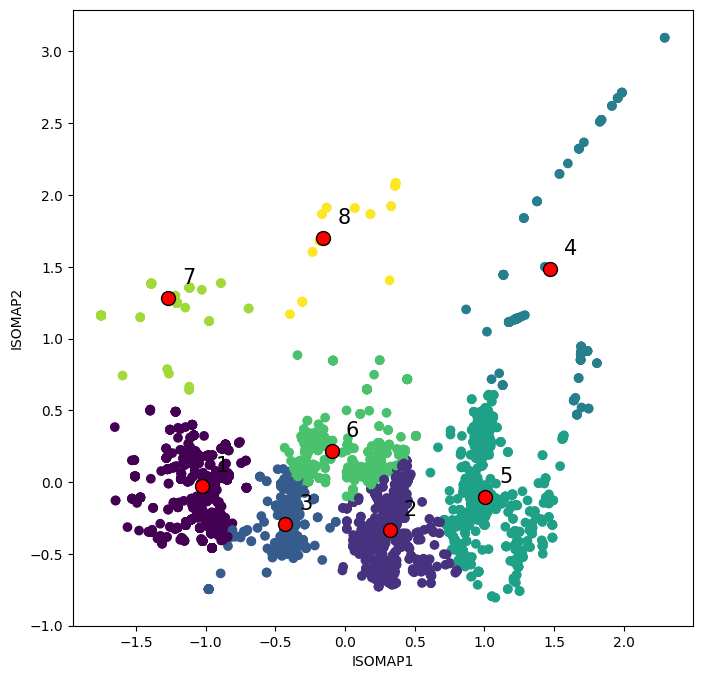

In [71]:
it=0
plt.figure(figsize=(8,8))
plt.scatter(data_red[:,0], data_red[:,1],c=kmeans.labels_)
for i in closest_points[0]:
  it+=1
  plt.scatter(data_red[i,0], data_red[i,1],marker='o',s=100,edgecolor="black",color="red" )
  plt.annotate(it, (data_red[i,0]+0.1, data_red[i,1]+0.1), color="black", fontsize=15)

plt.xlabel("ISOMAP1")
plt.ylabel("ISOMAP2")

In [72]:
subset=[]
for i in closest_points[0]:
  subset.append(tot[i])

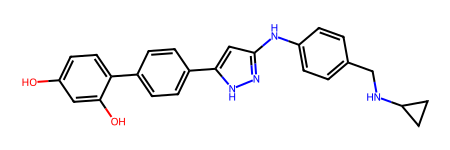

In [73]:
subset[0]

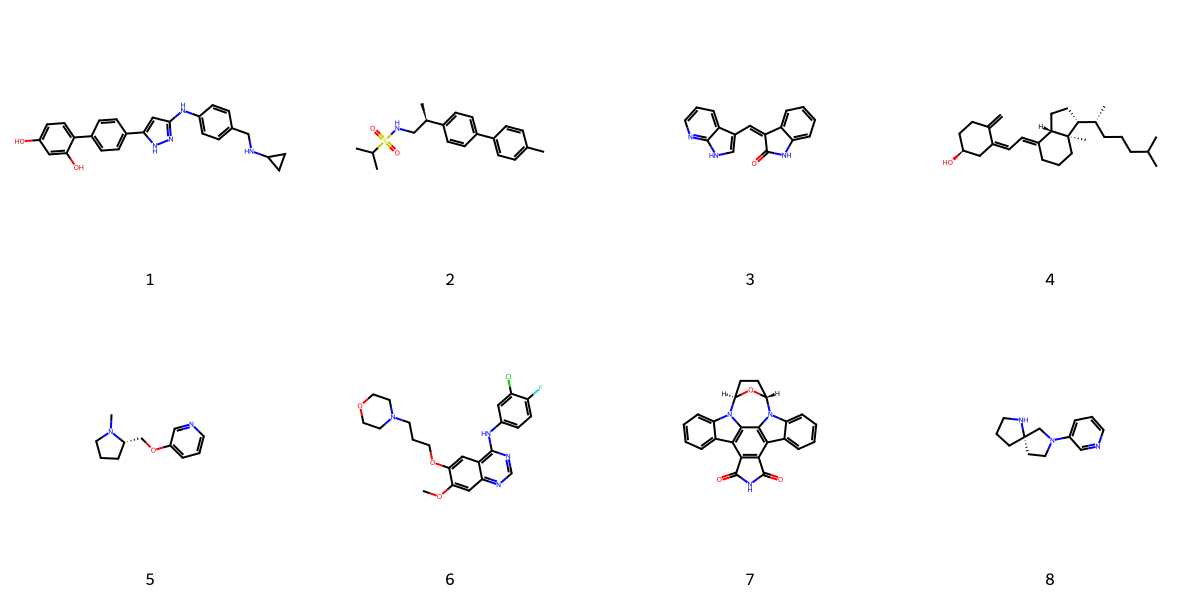

In [74]:
img=rdkit.Chem.Draw.MolsToGridImage(subset,molsPerRow=4,subImgSize=(300,300), legends=[str(x) for x in np.arange(1,9,1)])
img

### 2. t-SNE

In [75]:
from sklearn.manifold import  *

In [76]:
tsne=TSNE(perplexity=np.sqrt(len(X)))

In [77]:
data_red=tsne.fit_transform(X)

Text(0, 0.5, 't-SNE2')

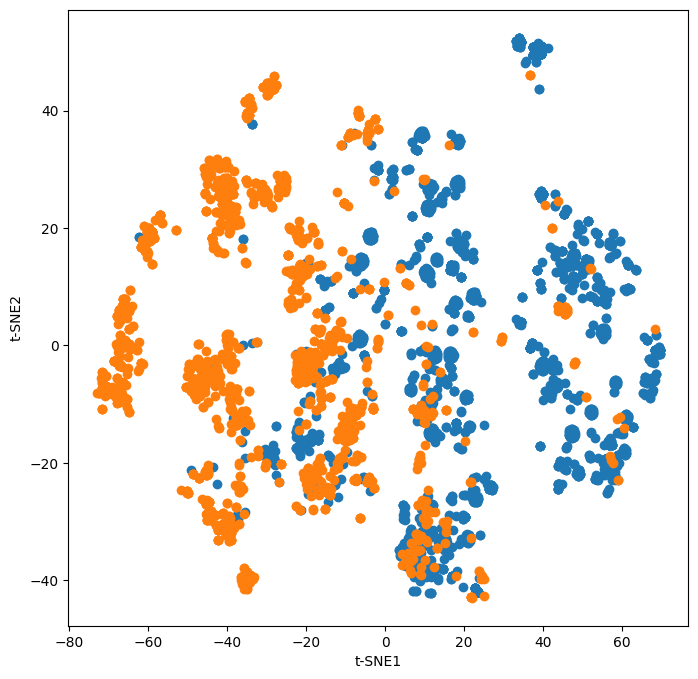

In [78]:
plt.figure(figsize=(8,8))
plt.scatter(data_red[:1999,0], data_red[:1999,1])
plt.scatter(data_red[2000:,0], data_red[2000:,1])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

In [79]:
kmeans=KMeans(n_clusters=8).fit(data_red[:,:2])

In [80]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

Text(0, 0.5, 't-SNE2')

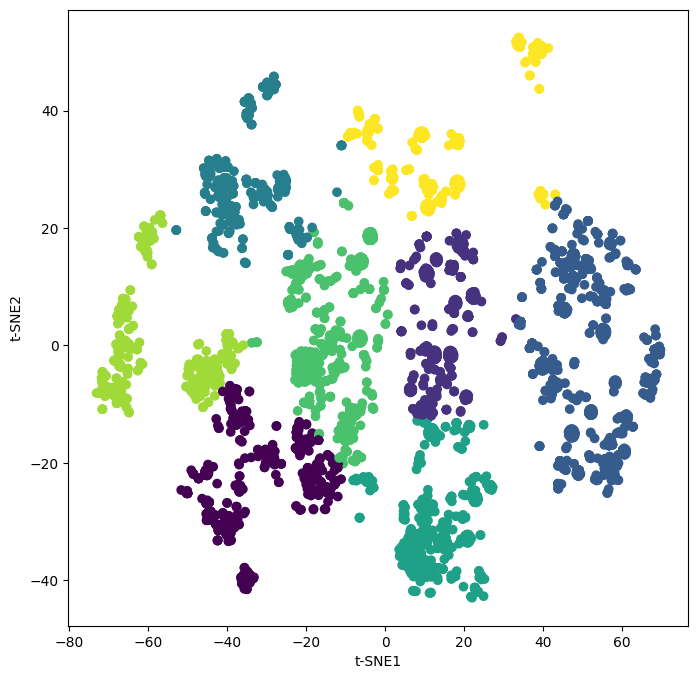

In [81]:
plt.figure(figsize=(8,8))
plt.scatter(data_red[:,0], data_red[:,1],c=kmeans.labels_)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

In [82]:
closest_points= pairwise_distances_argmin_min(kmeans.cluster_centers_, data_red[:,:2])
closest_points

(array([3633, 1623, 1238, 3534, 3339, 3425, 2602,   95]),
 array([3.13947105, 2.3246882 , 3.53857946, 0.01915784, 1.24942446,
        0.23946983, 4.4121685 , 0.62628675]))

Text(0, 0.5, 't-SNE2')

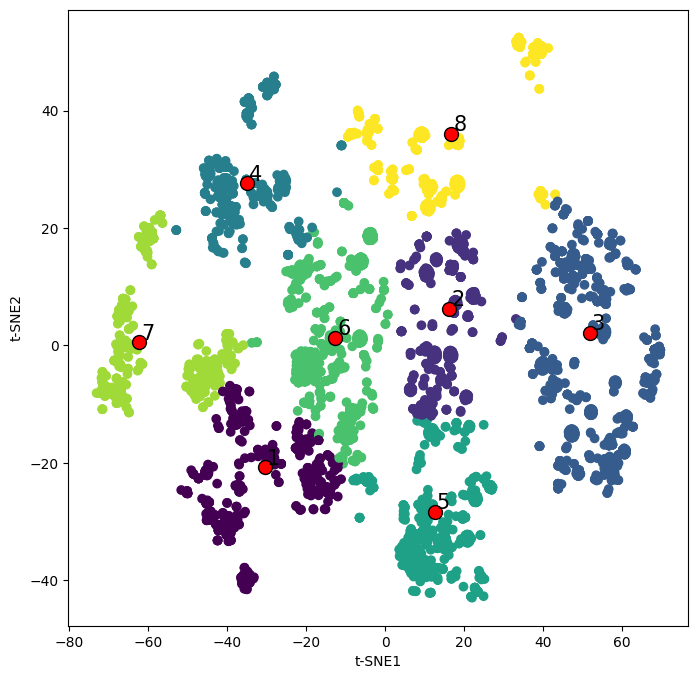

In [83]:
it=0
plt.figure(figsize=(8,8))
plt.scatter(data_red[:,0], data_red[:,1],c=kmeans.labels_)
for i in closest_points[0]:
  it+=1
  plt.scatter(data_red[i,0], data_red[i,1],marker='o',s=100,edgecolor="black",color="red" )
  plt.annotate(it, (data_red[i,0]+0.5, data_red[i,1]+0.5), color="black", fontsize=15)

plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

In [84]:
subset=[]
for i in closest_points[0]:
  subset.append(tot[i])

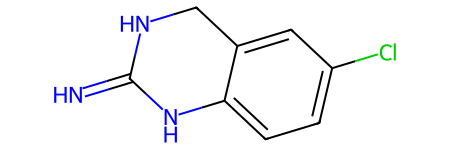

In [85]:
subset[0]

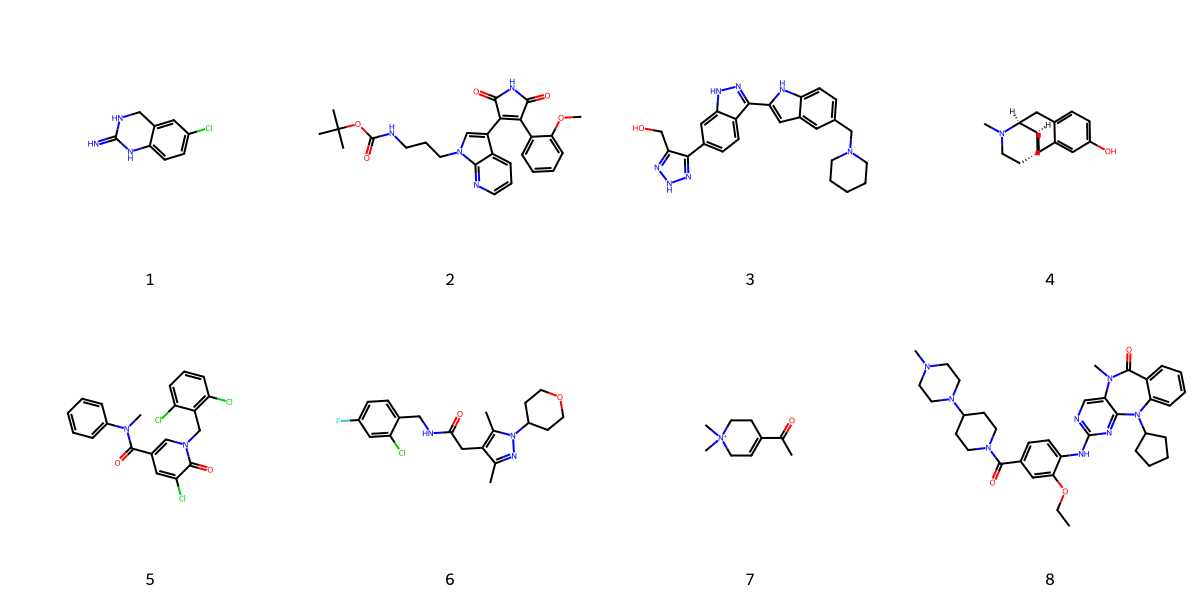

In [86]:
img=rdkit.Chem.Draw.MolsToGridImage(subset,molsPerRow=4,subImgSize=(300,300), legends=[str(x) for x in np.arange(1,9,1)])
img

In [94]:
closest_points[0][2]

np.int64(1238)

In [87]:
distance=np.sqrt(np.square(data_red[:,0]-(data_red[closest_points[0][2],0]))+np.square(data_red[:,1]-(data_red[closest_points[0][2],1])))

In [88]:
nearest_points=np.argsort(distance,axis=0)[:50]

In [89]:
nearest_points

array([1561, 1238, 1258, 1655, 1083,  384,  662,  964,  677, 1987, 1016,
       1894,  242, 1311,  149,  268,  514, 1799,  309,  581, 1702,   21,
         74,  835,  764, 1161, 1584, 1211, 1642,  913, 1447,  499,  397,
        703,  111,   31, 1352,  556,  874, 2584, 2938, 3720, 1267,  520,
       1742, 1969,  435, 1282, 1160,  251])

In [90]:
from rdkit import Chem

In [91]:
Chem.MolToSmiles(tot[0])

'CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\\C(=O)Nc3ccc(F)cc32)c1C'

In [92]:
nearest_mols=[]
unique_smiles=[]
for i in nearest_points:
  if Chem.MolToSmiles(tot[i]) not in unique_smiles:
    nearest_mols.append(tot[i])
    unique_smiles.append(Chem.MolToSmiles(tot[i]))


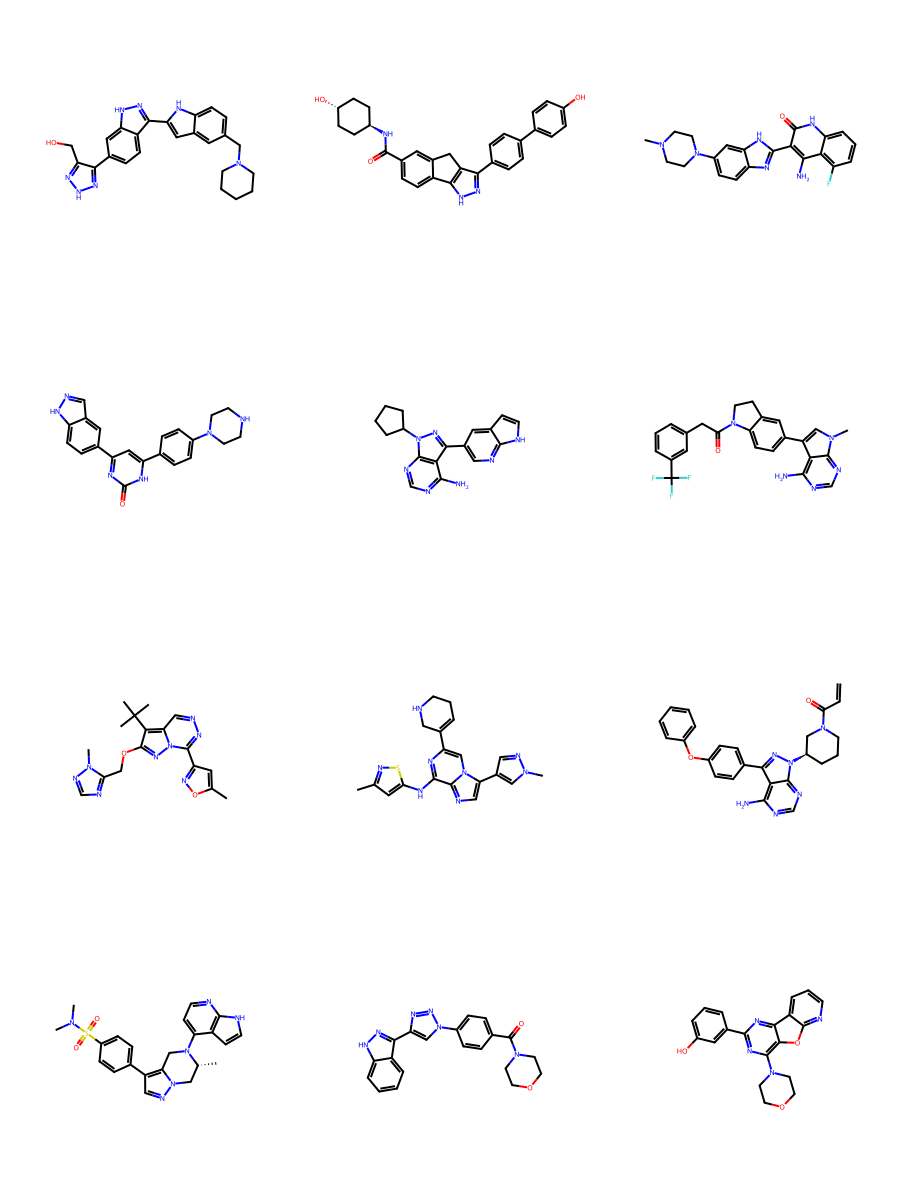

In [93]:
img=rdkit.Chem.Draw.MolsToGridImage(nearest_mols,molsPerRow=3,subImgSize=(300,300))
img

# Classification

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
x_reduced=data_red[:,0]

In [ ]:
x_reduced

In [ ]:
Y

In [ ]:
clr=LogisticRegression()

In [ ]:
clr.fit(x_reduced.reshape(-1,1),Y)

In [ ]:
clr.coef_

In [ ]:
clr.intercept_

In [ ]:
plt.scatter(x_reduced,Y,alpha=0.05,c=Y,cmap=matplotlib.colors.ListedColormap(["C0", "C1"]))
plt.xlabel("t-SNE1")
plt.ylabel("Class")

In [ ]:
x=np.linspace([x_reduced.min()-1,x_reduced.max()+1],100)

In [ ]:
response=np.exp(clr.intercept_+clr.coef_*x)/(np.exp(clr.intercept_+clr.coef_*x)+1)

In [ ]:
plt.scatter(x_reduced,Y,alpha=0.05,c=Y,cmap=matplotlib.colors.ListedColormap(["C0", "C1"]))
plt.plot(x,response,'--',c='k',lw=2)
plt.xlabel("t-SNE1")
plt.ylabel("Class")

## 2. Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda=LinearDiscriminantAnalysis()

In [ ]:
x_reduced=data_red[:,:2]

In [ ]:
lda.fit(x_reduced,Y)

In [ ]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(x_reduced[:, 0].min(), x_reduced[:, 0].max()),
    np.linspace(x_reduced[:, 1].min(), x_reduced[:, 1].max()))

In [ ]:
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

In [ ]:
y_predict=np.reshape(lda.predict(grid),feature_1.shape)

In [ ]:
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_predict)

In [ ]:
display.plot(cmap=matplotlib.colors.ListedColormap(["C0", "C1"]))
display.ax_.scatter(x_reduced[:, 0], x_reduced[:, 1], c=Y, edgecolor="k",cmap=matplotlib.colors.ListedColormap(["C0", "C1"]))
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

## 3. Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
svc=SVC(kernel='linear')
#svc=SVC(kernel='poly', degree=2)
#svc=SVC(kernel='poly', degree=3)
#svc=SVC(kernel='poly', degree=4)
#svc=SVC(kernel='sigmoid')
#svc=SVC(kernel='rbf')

In [ ]:
svc.fit(x_reduced,Y)

In [ ]:
y_predict=np.reshape(svc.predict(grid),feature_1.shape)

In [ ]:
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_predict)

In [ ]:
display.plot(cmap=matplotlib.colors.ListedColormap(["C0", "C1"]))
display.ax_.scatter(x_reduced[:, 0], x_reduced[:, 1], c=Y, edgecolor="k",cmap=matplotlib.colors.ListedColormap(["C0", "C1"]))
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")